In [1]:
# 1 Import pandas
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import random
import seaborn as sns
import math

In [2]:
centroid = gpd.read_file('pittsburgh_parcels_centroids.geojson', header = 1, engine = 'python')


In [21]:
price = pd.read_csv('property_price.csv', header = 0, engine = 'python')

In [36]:
price1 = price[['PRICE','PARID']]
price1 = price1.rename(columns={"PARID":"PIN"})
# df.rename(columns={"A": "a", "B": "c"})

In [37]:
price1.head()

,PRICE,PIN
0,120000.0,1075F00108000000
1,1783.0,0011A00237000000
2,4643.0,0011J00047000000
3,0.0,0113B00029000000
4,27541.0,0119S00024000000


In [25]:
centroid.head()

,OBJECTID,PIN,MAPBLOCKLO,MUNICODE,CALCACREAG,NOTES,PSEUDONO,MODIFIEDBY,MODIFIEDON,CREATEDBY,CREATEDON,COMMENTS,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,4888407,0124F00169000000,124-F-169,112,0.02,None,None,t099136,4/20/2005 10:57:18 AM,None,None,None,{0D7F9951-1B77-41EE-A5A0-6B12BF75E7EC},153.481404,1046.435052,POINT (-79.91072 40.46802)
1,4888408,0006K00358000000,6-K-358,119,0.04,None,None,t099136,2/19/2009 11:09:42 AM,None,None,None,{D87BC356-1572-4FC1-9709-2664AB33704C},235.746576,1791.194106,POINT (-80.02464 40.43572)
2,4888412,0080G00237000000,80-G-237,110,0.04,16-P-044,None,t099136,4/20/2005 10:57:03 AM,None,None,None,{0E9750B8-822E-4B2C-9099-F5CB89DC6745},130.001793,910.431435,POINT (-79.95400 40.47854)
3,4888416,0231N00002000000,231-N-2,113,0.02,None,None,t099136,4/20/2005 10:57:24 AM,None,None,None,{E1941AFC-2F8A-462F-988E-F1E5153E158F},134.016556,609.149884,POINT (-79.88268 40.45492)
4,4888422,0012J00200000000,12-J-200,117,0.04,None,None,t099136,4/20/2005 12:24:26 PM,None,None,None,{604A9870-A2DB-47C8-9E2D-63D02AE165FA},168.085832,1543.330196,POINT (-79.98171 40.42669)


In [38]:
centroid = centroid.merge(price1, on='PIN')

In [39]:
centroid.head()

,OBJECTID,PIN,MAPBLOCKLO,MUNICODE,CALCACREAG,NOTES,PSEUDONO,MODIFIEDBY,MODIFIEDON,CREATEDBY,CREATEDON,COMMENTS,GlobalID,SHAPE_Leng,SHAPE_Area,geometry,PRICE
0,4888408,0006K00358000000,6-K-358,119,0.04,None,None,t099136,2/19/2009 11:09:42 AM,None,None,None,{D87BC356-1572-4FC1-9709-2664AB33704C},235.746576,1791.194106,POINT (-80.02464 40.43572),134930.0
1,4888412,0080G00237000000,80-G-237,110,0.04,16-P-044,None,t099136,4/20/2005 10:57:03 AM,None,None,None,{0E9750B8-822E-4B2C-9099-F5CB89DC6745},130.001793,910.431435,POINT (-79.95400 40.47854),109300.0
2,4888427,0173N00352000000,173-N-352,113,0.04,None,None,t099136,4/20/2005 10:57:25 AM,None,None,None,{AD585FE0-E33E-4BE3-AA30-2A8CC06918FA},223.514249,1782.670532,POINT (-79.89814 40.46268),8000.0
3,4888435,0003J00128000000,3-J-128,118,0.05,None,None,t096746,8/21/2013 9:34:24 AM,None,None,None,{79418D3C-176D-4488-90ED-657180BFCFF4},213.762752,2246.038712,POINT (-79.99906 40.42659),187500.0
4,4888435,0003J00128000000,3-J-128,118,0.05,None,None,t096746,8/21/2013 9:34:24 AM,None,None,None,{79418D3C-176D-4488-90ED-657180BFCFF4},213.762752,2246.038712,POINT (-79.99906 40.42659),1.0


In [40]:
centroid['PRICE'].isnull().sum()

147

In [41]:
centroid.to_file("pittsburgh_parcels_centroids_withPrice.geojson", driver='GeoJSON')

In [47]:
centroid2 = centroid[centroid.PRICE > 1]
centroid2.head()

,OBJECTID,PIN,MAPBLOCKLO,MUNICODE,CALCACREAG,NOTES,PSEUDONO,MODIFIEDBY,MODIFIEDON,CREATEDBY,CREATEDON,COMMENTS,GlobalID,SHAPE_Leng,SHAPE_Area,geometry,PRICE
0,4888408,0006K00358000000,6-K-358,119,0.04,None,None,t099136,2/19/2009 11:09:42 AM,None,None,None,{D87BC356-1572-4FC1-9709-2664AB33704C},235.746576,1791.194106,POINT (-80.02464 40.43572),134930.0
1,4888412,0080G00237000000,80-G-237,110,0.04,16-P-044,None,t099136,4/20/2005 10:57:03 AM,None,None,None,{0E9750B8-822E-4B2C-9099-F5CB89DC6745},130.001793,910.431435,POINT (-79.95400 40.47854),109300.0
2,4888427,0173N00352000000,173-N-352,113,0.04,None,None,t099136,4/20/2005 10:57:25 AM,None,None,None,{AD585FE0-E33E-4BE3-AA30-2A8CC06918FA},223.514249,1782.670532,POINT (-79.89814 40.46268),8000.0
3,4888435,0003J00128000000,3-J-128,118,0.05,None,None,t096746,8/21/2013 9:34:24 AM,None,None,None,{79418D3C-176D-4488-90ED-657180BFCFF4},213.762752,2246.038712,POINT (-79.99906 40.42659),187500.0
5,4888445,0003M00098000000,3-M-98,117,0.03,None,None,t099136,4/20/2005 12:24:23 PM,None,None,None,{885328A9-58CA-4329-8127-22886F90D3B1},171.547730,1321.854695,POINT (-79.98365 40.42777),600.0


[(0, 1e-07), (0, 2000000)]

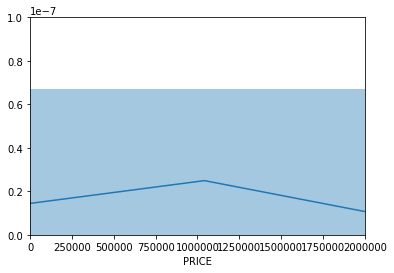

In [62]:
sns.distplot(centroid2['PRICE'],bins = 10).set(xlim=(0,2000000),ylim=(0,0.0000001))

In [66]:
gini = pd.read_csv('gini_allegheny_raw.csv', header = 0, engine = 'python')

In [70]:
gini['Geo_TRACT']

0       10300
1       20100
2       20300
3       30500
4       40200
        ...  
397    981000
398    981100
399    981200
400    981800
401    982200
Name: Geo_TRACT, Length: 402, dtype: int64

In [69]:
gini['TractText'] = gini['Geo_TRACT'] / 100
gini['TractText'] = gini['TractText'].astype(int)
new_gini = gini[['TractText','SE_A14028_001']]
new_gini.head()

,TractText,SE_A14028_001
0,103,0.5038
1,201,0.5156
2,203,0.4482
3,305,0.5466
4,402,0.5874


In [30]:
new_gini.to_csv("gini_cleaned.csv")

In [2]:
gini_csv = pd.read_csv('gini_censustracts.csv', header = 0, engine = 'python')

In [64]:
gini_csv['SE_A14028_001'].head()

NameError: name 'gini_csv' is not defined

In [8]:
race = pd.read_csv('race_allegheny_raw.csv', header = 0, engine = 'python')

In [9]:
race_cleaned = race[['Geo_TRACT','SE_A04001_001','SE_A04001_003','SE_A04001_004','SE_A04001_006','SE_A04001_010']]
race_cleaned['Geo_TRACT'].loc[:] = race_cleaned['Geo_TRACT'] / 100


<ipython-input-9-4f77e79b6e4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_cleaned['Geo_TRACT'].loc[:] = race_cleaned['Geo_TRACT'] / 100


In [10]:
race_cleaned = race_cleaned.rename(columns={'SE_A04001_001':'Total','SE_A04001_003': 'Non_His_White', 'SE_A04001_004': 'Non_His_Black', 'SE_A04001_006': 'Non_His_Asian', 'SE_A04001_010': 'Hispanic'})
race_cleaned['Total'] = race_cleaned['Non_His_White']+race_cleaned['Non_His_Black']+race_cleaned['Non_His_Asian']+race_cleaned['Hispanic']
race_cleaned.replace(to_replace=0, value=1, inplace=True)

race_cleaned['NHW_Perc'] = race_cleaned['Non_His_White'] / race_cleaned['Total']
race_cleaned['NHB_Perc'] = race_cleaned['Non_His_Black'] / race_cleaned['Total']
race_cleaned['NHA_Perc'] = race_cleaned['Non_His_Asian'] / race_cleaned['Total']
race_cleaned['H_Perc'] = race_cleaned['Hispanic'] / race_cleaned['Total']

race_cleaned['entropy_score'] = race_cleaned['NHW_Perc']*np.log(1/race_cleaned['NHW_Perc']) + race_cleaned['NHB_Perc']*np.log(1/race_cleaned['NHB_Perc']) + race_cleaned['NHA_Perc']*np.log(1/race_cleaned['NHA_Perc']) + race_cleaned['H_Perc']*np.log(1/race_cleaned['H_Perc'])


race_cleaned.head(10)

,Geo_TRACT,Total,Non_His_White,Non_His_Black,Non_His_Asian,Hispanic,NHW_Perc,NHB_Perc,NHA_Perc,H_Perc,entropy_score
0,103.0,6367,4063,1833,231,240,0.638134,0.287891,0.036281,0.037694,0.889024
1,201.0,4973,3929,361,454,229,0.790066,0.072592,0.091293,0.046049,0.736838
2,203.0,1005,890,21,60,34,0.885572,0.020896,0.059701,0.033831,0.471271
3,305.0,2104,216,1715,31,142,0.102662,0.815114,0.014734,0.067490,0.644402
4,402.0,1616,736,627,194,59,0.455446,0.387995,0.120050,0.036510,1.100879
5,404.0,1944,1182,216,510,36,0.608025,0.111111,0.262346,0.018519,0.971565
6,405.0,3322,2981,58,201,82,0.897351,0.017459,0.060506,0.024684,0.428954
7,406.0,2040,1712,133,125,70,0.839216,0.065196,0.061275,0.034314,0.611928
8,409.0,3179,2398,532,142,107,0.754325,0.167348,0.044668,0.033658,0.764836
9,501.0,1740,134,1588,18,1,0.077011,0.912644,0.010345,0.000575,0.332444


In [59]:
race_cleaned['Geo_TRACT'] = race_cleaned['Geo_TRACT'].astype(int)
race_cleaned.dtypes
race_cleaned.head(20)

,Geo_TRACT,Total,Non_His_White,Non_His_Black,Non_His_Asian,Hispanic,NHW_Perc,NHB_Perc,NHA_Perc,H_Perc,entropy_score
0,103,6367,4063,1833,231,240,0.638134,0.287891,0.036281,0.037694,0.889024
1,201,4973,3929,361,454,229,0.790066,0.072592,0.091293,0.046049,0.736838
2,203,1005,890,21,60,34,0.885572,0.020896,0.059701,0.033831,0.471271
3,305,2104,216,1715,31,142,0.102662,0.815114,0.014734,0.067490,0.644402
4,402,1616,736,627,194,59,0.455446,0.387995,0.120050,0.036510,1.100879
5,404,1944,1182,216,510,36,0.608025,0.111111,0.262346,0.018519,0.971565
6,405,3322,2981,58,201,82,0.897351,0.017459,0.060506,0.024684,0.428954
7,406,2040,1712,133,125,70,0.839216,0.065196,0.061275,0.034314,0.611928
8,409,3179,2398,532,142,107,0.754325,0.167348,0.044668,0.033658,0.764836
9,501,1741,134,1588,18,1,0.076967,0.912119,0.010339,0.000574,0.332828


In [60]:
race_cleaned.to_csv("entropy_cleaned.csv")

In [8]:
age = pd.read_csv('age_allegheny_raw_friendlyname.csv', header = 1, engine = 'python')
age.columns

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_US',
       'Geo_REGION', 'Geo_DIVISION', 'Geo_STATECE', 'Geo_STATE', 'Geo_COUNTY',
       'Geo_COUSUB', 'Geo_PLACE', 'Geo_PLACESE', 'Geo_TRACT', 'Geo_BLKGRP',
       'Geo_CONCIT', 'Geo_AIANHH', 'Geo_AIANHHFP', 'Geo_AIHHTLI', 'Geo_AITSCE',
       'Geo_AITS', 'Geo_ANRC', 'Geo_CBSA', 'Geo_CSA', 'Geo_METDIV', 'Geo_MACC',
       'Geo_MEMI', 'Geo_NECTA', 'Geo_CNECTA', 'Geo_NECTADIV', 'Geo_UA',
       'Geo_UACP', 'Geo_CDCURR', 'Geo_SLDU', 'Geo_SLDL', 'Geo_VTD',
       'Geo_ZCTA3', 'Geo_ZCTA5', 'Geo_SUBMCD', 'Geo_SDELM', 'Geo_SDSEC',
       'Geo_SDUNI', 'Geo_UR', 'Geo_PCI', 'Geo_TAZ', 'Geo_UGA', 'Geo_BTTR',
       'Geo_BTBG', 'Geo_PUMA5', 'Geo_PUMA1', 'SE_A01001_001', 'SE_A01001_002',
       'SE_A01001_003', 'SE_A01001_004', 'SE_A01001_005', 'SE_A01001_006',
       'SE_A01001_007', 'SE_A01001_008', 'SE_A01001_009', 'SE_A01001_010',
       'SE_A01001_011

In [10]:
age_cleaned['Geo_TRACT'] = age['Geo_TRACT'] / 100
age_cleaned = age_cleaned['Geo_TRACT'].astype(int)
age_cleaned['Total'] = age['SE_A01001_001']

NameError: name 'age_cleaned' is not defined

In [ ]:
# generation
# Silent: 1928-45: 73-90
# Boomer: 1946-64: 54-72
# GenerationX: 1965-80: 38-53
# Millenials: 1981-96: 22-37
# GenerationZ: 1997-12: 6-21

In [107]:
age_cleaned['GenerationZ'] = age['SE_A01001_002'] + age['SE_A01001_003'] + age['SE_A01001_004'] + age['SE_A01001_005'] + age['SE_A01001_006']
age_cleaned['Millenials'] = age['SE_A01001_007']
age_cleaned['GenerationX'] = age['SE_A01001_008'] + age['SE_A01001_009']
age_cleaned['Boomer'] = age['SE_A01001_010'] + age['SE_A01001_011']
age_cleaned['Silent'] = age['SE_A01001_012'] + age['SE_A01001_013']

age_cleaned.replace(to_replace=0, value=1, inplace=True)


age_cleaned.head()

,Geo_TRACT,Total,GenerationZ,Millenials,GenerationX,Boomer,Silent
0,103,6668,4223,1240,837,319,49
1,201,5101,1778,1446,590,1097,190
2,203,1020,84,496,293,136,11
3,305,2249,645,358,566,421,259
4,402,1703,906,263,172,269,93


In [100]:
age_cleaned['entropy_score'] = age_cleaned['GenerationZ%']*np.log(1/age_cleaned['GenerationZ%']) + age_cleaned['Millenials%']*np.log(1/age_cleaned['Millenials%']) + age_cleaned['GenerationX%']*np.log(1/age_cleaned['GenerationX%']) + age_cleaned['Boomer%']*np.log(1/age_cleaned['Boomer%'])+age_cleaned['Silent%']*np.log(1/age_cleaned['Silent%'])

age_cleaned.head(-1)

,Geo_TRACT,Total,GenerationZ,Millenials,GenerationX,Boomer,Silent,GenerationZ%,Millenials%,GenerationX%,Boomer%,Silent%,entropy_score
0,103,6668,4223,1240,837,319,49,0.633323,0.185963,0.125525,0.047840,0.007349,1.044144
1,201,5101,1778,1446,590,1097,190,0.348559,0.283474,0.115664,0.215056,0.037248,1.427276
2,203,1020,84,496,293,136,11,0.082353,0.486275,0.287255,0.133333,0.010784,1.232030
3,305,2249,645,358,566,421,259,0.286794,0.159182,0.251667,0.187194,0.115162,1.560523
4,402,1703,906,263,172,269,93,0.532002,0.154433,0.100998,0.157957,0.054610,1.306063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,9809,1652,132,677,731,112,1,0.079903,0.409806,0.442494,0.067797,0.000605,1.115207
397,9810,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
398,9811,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
399,9812,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [3]:
age_cleaned.to_csv("age_entropy_cleaned.csv")

NameError: name 'age_cleaned' is not defined

In [2]:
ami = pd.read_csv('ami_allegheny_raw.csv', header = 1, engine = 'python')
ami_cleaned= ami[['SE_A14006_001']]
ami_cleaned = ami_cleaned.rename(columns = {'SE_A14006_001': 'ami'})
ami_cleaned['Geo_TRACT'] = ami['Geo_TRACT'] / 100
ami_cleaned['Geo_TRACT'] = ami_cleaned['Geo_TRACT'].astype(int)
ami_cleaned['80%ami'] = ami_cleaned['ami'] * 0.8
ami_cleaned['120%ami'] = ami_cleaned['ami'] * 1.2

In [3]:
ami_cleaned.head(20)

,ami,Geo_TRACT,80%ami,120%ami
0,21136.0,103,16908.8,25363.2
1,87885.0,201,70308.0,105462.0
2,99397.0,203,79517.6,119276.4
3,17776.0,305,14220.8,21331.2
4,17773.0,402,14218.4,21327.6
5,30250.0,404,24200.0,36300.0
6,17932.0,405,14345.6,21518.4
7,22981.0,406,18384.8,27577.2
8,21277.0,409,17021.6,25532.4
9,16366.0,501,13092.8,19639.2


In [4]:
ami_cleaned['households'] = ami['SE_A14001_001']
ami_cleaned['0'] = ami['SE_A14001_002']
ami_cleaned['10000'] = ami['SE_A14001_003']
ami_cleaned['15000'] = ami['SE_A14001_004']
ami_cleaned['20000'] = ami['SE_A14001_005']
ami_cleaned['25000'] = ami['SE_A14001_006']
ami_cleaned['30000'] = ami['SE_A14001_007']
ami_cleaned['35000'] = ami['SE_A14001_008']
ami_cleaned['40000'] = ami['SE_A14001_009']
ami_cleaned['45000'] = ami['SE_A14001_010']
ami_cleaned['50000'] = ami['SE_A14001_011']
ami_cleaned['60000'] = ami['SE_A14001_012']
ami_cleaned['75000'] = ami['SE_A14001_013']
ami_cleaned['100000'] = ami['SE_A14001_014']
ami_cleaned['125000'] = ami['SE_A14001_015']
ami_cleaned['150000'] = ami['SE_A14001_016']
ami_cleaned['200000'] = ami['SE_A14001_017']

In [5]:
ami_cleaned.head()

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,35000,40000,45000,50000,60000,75000,100000,125000,150000,200000
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,3,0,27,26,8,11,0,11,21,0
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,32,65,21,109,238,195,218,176,138,598
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,17,5,19,55,76,130,68,77,73,131
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,40,43,37,54,57,19,8,23,18,18
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,24,43,23,17,13,36,7,13,18,3


In [71]:
column_index = [[0,5,10000], [10000,6,5000], [15000,7,5000], [20000,8,5000], [25000,9,5000], [30000,10,5000], [35000,11,5000], [40000,12,5000], [45000,13,5000], [50000,14,10000], [60000,15,15000], [75000,16,25000], [100000,17,25000], [125000,18,25000], [150000,19,50000], [200000,20,50000]]
column_index

[[0, 5, 10000],
 [10000, 6, 5000],
 [15000, 7, 5000],
 [20000, 8, 5000],
 [25000, 9, 5000],
 [30000, 10, 5000],
 [35000, 11, 5000],
 [40000, 12, 5000],
 [45000, 13, 5000],
 [50000, 14, 10000],
 [60000, 15, 15000],
 [75000, 16, 25000],
 [100000, 17, 25000],
 [125000, 18, 25000],
 [150000, 19, 50000],
 [200000, 20, 50000]]

In [11]:
ami_cleaned['start'] = 0
ami_cleaned['end'] = 0
ami_cleaned['range'] = 0

In [12]:
for index, row in ami_cleaned.iterrows():
    col_start = 0
    min_gap_start = 210000
    col_end = 0
    min_gap_end = 210000

    for i in column_index:
        gap = abs(row['80%ami'] - i[0])
        if gap < min_gap_start:
            min_gap_start = gap
            col_start = i[1]

        if abs(row['120%ami'] - i[0]) < min_gap_end:
            min_gap_end = abs(row['120%ami'] - i[0])
            col_end = i[1]
            
    ami_cleaned['start'][index] = col_start
    ami_cleaned['end'][index] = col_end - 1
    
#     while row['80%ami'] > column_index[start][0]:
#         print(column_index[start][0])
#         start += 1
#         print(start)

#     while row['120%ami'] < column_index[end][0]:
#         print(column_index[end][0])
#         end -= 1
#         print(end)

#     start -= 1

#     print('\n')
#     print(column_index[start][1],column_index[end][1])

#     ami_cleaned['start'][index] = column_index[start][1]
#     ami_cleaned['end'][index] = column_index[end][1]
    
            
            

<ipython-input-12-884c69f7a942>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ami_cleaned['start'][index] = col_start
<ipython-input-12-884c69f7a942>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ami_cleaned['end'][index] = col_end - 1


In [13]:
ami_cleaned.head(10)

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,50000,60000,75000,100000,125000,150000,200000,start,end,range
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,26,8,11,0,11,21,0,7,8,0
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,109,238,195,218,176,138,598,16,16,0
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,55,76,130,68,77,73,131,16,17,0
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,54,57,19,8,23,18,18,7,7,0
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,17,13,36,7,13,18,3,7,7,0
5,30250.0,404,24200.0,36300.0,1193,373,27,55,64,75,...,113,51,79,79,11,25,65,9,10,0
6,17932.0,405,14345.6,21518.4,1157,428,102,118,100,130,...,23,17,8,12,8,0,9,7,7,0
7,22981.0,406,18384.8,27577.2,918,259,73,92,77,75,...,64,79,24,25,18,7,0,8,9,0
8,21277.0,409,17021.6,25532.4,1399,290,194,192,78,54,...,112,76,49,53,46,43,5,7,8,0
9,16366.0,501,13092.8,19639.2,1005,250,229,92,79,72,...,30,28,21,18,35,0,0,7,7,0


In [61]:
for index, row in ami_cleaned.iterrows():
    start = row['start'].astype(int)
    end = row['end'].astype(int)
    ami_cleaned['range'][index] = row.iloc[start:end+1].sum()

<ipython-input-61-0c226125720f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ami_cleaned['range'][index] = row.iloc[start:end+1].sum()


In [62]:
ami_cleaned.head()

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,75000,100000,125000,150000,200000,start,end,range,citizens_lower_than_80%ami,citizens_higher_than_80%ami
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,11,0,11,21,0,7,8,104,82,0
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,195,218,176,138,598,16,16,195,0,0
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,130,68,77,73,131,16,17,198,0,0
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,19,8,23,18,18,7,7,138,0,0
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,36,7,13,18,3,7,7,56,0,0


In [15]:
ami_cleaned = ami_cleaned.rename(columns={"citizens_lower_than_80%ami":"citizens_betwee80%-120%ami"})

In [20]:
ami_cleaned['citizens_lower_than_80%ami'] = 0
ami_cleaned['citizens_higher_than_80%ami'] = 0


In [23]:
for index, row in ami_cleaned.iterrows():
    start = 5
    mid = row['start'].astype(int)
    end = 20
    ami_cleaned['citizens_lower_than_80%ami'][index] = row.iloc[start:mid].sum()
    ami_cleaned['citizens_higher_than_80%ami'][index] = row['households'] - row['citizens_lower_than_80%ami'] - row['citizens_betwee80%-120%ami']

<ipython-input-23-909cc052a306>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ami_cleaned['citizens_lower_than_80%ami'][index] = row.iloc[start:mid].sum()


KeyError: 'citizens_betwee80%-120%ami'

In [22]:
ami_cleaned.head()

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,75000,100000,125000,150000,200000,start,end,range,citizens_lower_than_80%ami,citizens_higher_than_80%ami
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,11,0,11,21,0,7,8,104,82,0
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,195,218,176,138,598,16,16,195,0,0
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,130,68,77,73,131,16,17,198,0,0
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,19,8,23,18,18,7,7,138,0,0
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,36,7,13,18,3,7,7,56,0,0


In [150]:
ami_cleaned['Geo_TRACT'] = ami_cleaned['Geo_TRACT'].astype(str)
ami_cleaned.dtypes

ami                            float64
Geo_TRACT                       object
80%ami                         float64
120%ami                        float64
households                       int64
0                                int64
10000                            int64
15000                            int64
20000                            int64
25000                            int64
30000                            int64
35000                            int64
40000                            int64
45000                            int64
50000                            int64
60000                            int64
75000                            int64
100000                           int64
125000                           int64
150000                           int64
200000                           int64
start                            int64
end                              int64
citizens_betwee80%-120%ami       int64
citizens_lower_than_80%ami       int64
citizens_higher_than_80%a

In [151]:
ami_cleaned.to_csv('ami_cleaned.csv')

In [152]:
renters = pd.read_csv('renters_allegheny_raw.csv', header = 1, engine = 'python')
renters.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A10060_001,SE_A10060_002,SE_A10060_003
0,42003010300,14000US42003010300,Census Tract 103,"Census Tract 103, Allegheny County, Pennsylvania",pa,140,0,ACSSF,6111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320,62,258
1,42003020100,14000US42003020100,Census Tract 201,"Census Tract 201, Allegheny County, Pennsylvania",pa,140,0,ACSSF,6112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2514,432,2082
2,42003020300,14000US42003020300,Census Tract 203,"Census Tract 203, Allegheny County, Pennsylvania",pa,140,0,ACSSF,6113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712,93,619
3,42003030500,14000US42003030500,Census Tract 305,"Census Tract 305, Allegheny County, Pennsylvania",pa,140,0,ACSSF,6114,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1139,261,878
4,42003040200,14000US42003040200,Census Tract 402,"Census Tract 402, Allegheny County, Pennsylvania",pa,140,0,ACSSF,6115,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631,157,474


In [159]:
renters.cleaned = renters[['SE_A10060_001','SE_A10060_002','SE_A10060_003']]
renters.cleaned = renters.cleaned.rename(columns = {'SE_A10060_001':'house_number','SE_A10060_002':'owner_occupied', 'SE_A10060_003' : 'renter_occupied'})
renters.cleaned['Geo_Tract'] = renters['Geo_TRACT'] / 100
renters.cleaned['Geo_Tract'] = renters.cleaned['Geo_Tract'].astype(int)
renters.cleaned['owner%'] = renters.cleaned['owner_occupied'] / renters.cleaned['house_number']
renters.cleaned['renter%'] = renters.cleaned['renter_occupied'] / renters.cleaned['house_number']

renters.cleaned.head()


,house_number,owner_occupied,renter_occupied,Geo_Tract,owner%,renter%
0,320,62,258,103,0.193750,0.806250
1,2514,432,2082,201,0.171838,0.828162
2,712,93,619,203,0.130618,0.869382
3,1139,261,878,305,0.229148,0.770852
4,631,157,474,402,0.248811,0.751189


In [161]:
renters.cleaned.to_csv('renter_percent_cleaned.csv')

In [57]:
a = pd.read_csv('ami_cleaned.csv')
a = a.drop(a.columns[[0]], axis=1)

In [58]:
a.head(10)

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,75000,100000,125000,150000,200000,start,end,citizens_betwee80%-120%ami,citizens_lower_than_80%ami,citizens_higher_than_80%ami
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,11,0,11,21,0,7,8,104,82,134
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,195,218,176,138,598,16,16,195,1189,1130
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,130,68,77,73,131,16,17,198,233,281
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,19,8,23,18,18,7,7,138,492,509
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,36,7,13,18,3,7,7,56,288,287
5,30250.0,404,24200.0,36300.0,1193,373,27,55,64,75,...,79,79,11,25,65,9,10,159,519,515
6,17932.0,405,14345.6,21518.4,1157,428,102,118,100,130,...,8,12,8,0,9,7,7,118,530,509
7,22981.0,406,18384.8,27577.2,918,259,73,92,77,75,...,24,25,18,7,0,8,9,152,424,342
8,21277.0,409,17021.6,25532.4,1399,290,194,192,78,54,...,49,53,46,43,5,7,8,270,484,645
9,16366.0,501,13092.8,19639.2,1005,250,229,92,79,72,...,21,18,35,0,0,7,7,92,479,434


In [74]:
a['start_column_range'] = 0
a['end_column_range'] = 0

In [97]:
for index, row in a.iterrows():
    col_start = 0
    col_end = 0

    for i in column_index:
        if row['80%ami'] > i[0]:
            col_start = i[1]
            record1 = i[0]
            gap1 = i[2]
    
        if row['120%ami'] > i[0]:
            col_end = i[1] 
            record2 = i[0]
            gap2 = i[2]
        
    a['start'][index] = col_start
    a['end'][index] = col_end
    a['start_threshold'][index] = record1
    a['end_threshold'][index] = record2
    a['start_column_range'][index] = gap1
    a['end_column_range'][index] = gap2

        

<ipython-input-97-e4044f6c071a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['start'][index] = col_start
<ipython-input-97-e4044f6c071a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['end'][index] = col_end
<ipython-input-97-e4044f6c071a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['start_threshold'][index] = record1
<ipython-input-97-e4044f6c071a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [98]:
a.head(10)

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,200000,start,end,citizens_betwee80%-120%ami,citizens_lower_than_80%ami,citizens_higher_than_80%ami,start_threshold,end_threshold,start_column_range,end_column_range
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,0,7,9,62.221120,82,175.0,15000,25000,5000,5000
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,598,15,17,99.075040,951,1225.0,60000,100000,15000,25000
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,131,16,17,90.940288,233,388.0,75000,100000,25000,25000
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,18,6,8,85.753280,347,561.0,10000,20000,5000,5000
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,3,6,8,35.498880,250,307.0,10000,20000,5000,5000
5,30250.0,404,24200.0,36300.0,1193,373,27,55,64,75,...,65,8,11,152.220000,455,521.0,20000,35000,5000,5000
6,17932.0,405,14345.6,21518.4,1157,428,102,118,100,130,...,9,6,8,61.717760,428,565.0,10000,20000,5000,5000
7,22981.0,406,18384.8,27577.2,918,259,73,92,77,75,...,0,7,9,70.377680,332,423.0,15000,25000,5000,5000
8,21277.0,409,17021.6,25532.4,1399,290,194,192,78,54,...,5,7,9,144.120480,484,770.0,15000,25000,5000,5000
9,16366.0,501,13092.8,19639.2,1005,250,229,92,79,72,...,0,6,7,80.711040,250,445.0,10000,15000,5000,5000


In [99]:
for index, row in a.iterrows():
    start = row['start'].astype(int)
    end = row['end'].astype(int)
    a['citizens_betwee80%-120%ami'][index] = row.iloc[start:end+1].sum()
    if index == 0:
        print(a['citizens_betwee80%-120%ami'][index])
    a['citizens_betwee80%-120%ami'][index] += -row.iloc[start] * ((row['80%ami'] - row['start_threshold'])/row['start_column_range']) - row.iloc[end] * (1 - (row['120%ami'] - row['end_threshold']) / row['end_column_range'])
    
    if index == 0:
        print(row.iloc[start], row.iloc[end], ((row['80%ami'] - row['start_threshold'])/row['start_column_range']),  row.iloc[end] *(1 - (row['120%ami'] - row['end_threshold']) / row['end_column_range']))

119.0
73.0 15.0 0.3817599999999999 13.910399999999997


<ipython-input-99-10149e53fac0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['citizens_betwee80%-120%ami'][index] = row.iloc[start:end+1].sum()
<ipython-input-99-10149e53fac0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['citizens_betwee80%-120%ami'][index] += -row.iloc[start] * ((row['80%ami'] - row['start_threshold'])/row['start_column_range']) - row.iloc[end] * (1 - (row['120%ami'] - row['end_threshold']) / row['end_column_range'])


In [100]:
a['citizens_betwee80%-120%ami'] = a['citizens_betwee80%-120%ami'].round(0)
a.head()

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,200000,start,end,citizens_betwee80%-120%ami,citizens_lower_than_80%ami,citizens_higher_than_80%ami,start_threshold,end_threshold,start_column_range,end_column_range
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,0,7,9,77.0,82,175.0,15000,25000,5000,5000
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,598,15,17,317.0,951,1225.0,60000,100000,15000,25000
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,131,16,17,159.0,233,388.0,75000,100000,25000,25000
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,18,6,8,188.0,347,561.0,10000,20000,5000,5000
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,3,6,8,71.0,250,307.0,10000,20000,5000,5000


In [108]:
for index, row in a.iterrows():
    start = 5
    mid = row['start'].astype(int)
    end = 20
    a['citizens_lower_than_80%ami'][index] = row.iloc[start:mid].sum() + row.iloc[mid] * (((row['80%ami'] - row['start_threshold'])/row['start_column_range']))
    a['citizens_lower_than_80%ami'][index] = a['citizens_lower_than_80%ami'][index].round(0)
    a['citizens_higher_than_80%ami'][index] = row['households'] - row['citizens_lower_than_80%ami'] - row['citizens_betwee80%-120%ami']
    a['citizens_higher_than_80%ami'][index] = a['citizens_higher_than_80%ami'][index].round(0)

<ipython-input-108-b1811d6433c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['citizens_lower_than_80%ami'][index] = row.iloc[start:mid].sum() + row.iloc[mid] * (((row['80%ami'] - row['start_threshold'])/row['start_column_range']))
<ipython-input-108-b1811d6433c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['citizens_lower_than_80%ami'][index] = a['citizens_lower_than_80%ami'][index].round(0)
<ipython-input-108-b1811d6433c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [109]:
a.head(20)

,ami,Geo_TRACT,80%ami,120%ami,households,0,10000,15000,20000,25000,...,200000,start,end,citizens_betwee80%-120%ami,citizens_lower_than_80%ami,citizens_higher_than_80%ami,start_threshold,end_threshold,start_column_range,end_column_range
0,21136.0,103,16908.8,25363.2,320,47,35,73,31,15,...,0,7,9,77.0,110.0,133.0,15000,25000,5000,5000
1,87885.0,201,70308.0,105462.0,2514,239,135,76,71,125,...,598,15,17,317.0,1115.0,1082.0,60000,100000,15000,25000
2,99397.0,203,79517.6,119276.4,712,25,9,20,0,7,...,131,16,17,159.0,256.0,297.0,75000,100000,25000,25000
3,17776.0,305,14220.8,21331.2,1139,347,145,138,102,53,...,18,6,8,188.0,469.0,482.0,10000,20000,5000,5000
4,17773.0,402,14218.4,21327.6,631,250,38,56,36,15,...,3,6,8,71.0,282.0,278.0,10000,20000,5000,5000
5,30250.0,404,24200.0,36300.0,1193,373,27,55,64,75,...,65,8,11,175.0,509.0,509.0,20000,35000,5000,5000
6,17932.0,405,14345.6,21518.4,1157,428,102,118,100,130,...,9,6,8,162.0,517.0,478.0,10000,20000,5000,5000
7,22981.0,406,18384.8,27577.2,918,259,73,92,77,75,...,0,7,9,145.0,394.0,379.0,15000,25000,5000,5000
8,21277.0,409,17021.6,25532.4,1399,290,194,192,78,54,...,5,7,9,198.0,562.0,639.0,15000,25000,5000,5000
9,16366.0,501,13092.8,19639.2,1005,250,229,92,79,72,...,0,6,7,173.0,392.0,440.0,10000,15000,5000,5000


In [110]:
a.to_csv('parsed_data/ami_cleaned.csv')